In [23]:
# Imports 
import pandas as pd
from datetime import datetime
import ast
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats


#for LDA:
import gzip
import tarfile
import xml.etree.ElementTree as ET
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore

In [24]:
# function that extracts the meaningful words in each XML file
def parse_corenlp_file(file):
    with gzip.open(file, 'rt', encoding='utf-8') as f:
        tree = ET.parse(f)
        root = tree.getroot()
        filtered_words = []
        for token in root.iter('token'):
            lemma = token.find('lemma').text
            pos = token.find('POS').text
            if pos in {'NN', 'NNS'} or pos.startswith('VB') or pos.startswith('JJ'):
                filtered_words.append(lemma)
        return ' '.join(filtered_words)

In [25]:
#os.chdir(os.path.join(os.getcwd(), "..", ".."))

tar_path = 'data/corenlp_plot_summaries.tar'

documents = []
ids = []


with tarfile.open(tar_path, 'r') as tar:
    for member in tar.getmembers():
        if member.name.endswith('.xml.gz'):
            with tar.extractfile(member) as xml_gz_file:
                film_id = member.name.split('/')[-1].replace('.xml.gz', '')
                ids.append(film_id)
                document = parse_corenlp_file(xml_gz_file)
                documents.append(document)

In [33]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
# tokenized_documents = [doc.lower().split() for doc in documents]
weak_verbs = {
    "accept", "achieve", "act", "add", "admit", "affect", "afford", "agree", "aim", "allow", "appear", "apply", "argue",
    "arrange", "arrive", "ask", "assume", "avoid", "be", "become", "begin", "believe", "belong", "bring", "build", "buy", "call",
    "carry", "cause", "change", "choose", "claim", "close", "collect", "come", "commit", "compare", "complete",
    "consider", "consist", "continue", "contribute", "control", "cope", "create", "cut", "deal", "decide", "decline",
    "deliver", "demand", "depend", "describe", "design", "destroy", "determine", "develop", "die", "differ", "discover",
    "discuss", "display", "do", "dominate", "draw", "dress", "drink", "drive", "eat", "encourage", "end", "enjoy",
    "enter", "establish", "examine", "exist", "expect", "experience", "explain", "express", "fail", "fall", "feel",
    "fight", "find", "follow", "form", "function", "gain", "get", "give", "go", "grow", "guess", "handle", "happen",
    "have", "hear", "help", "hide", "hold", "hope", "identify", "imagine", "implement", "improve", "include", "increase",
    "influence", "inform", "initiate", "insist", "intend", "introduce", "involve", "join", "keep", "kill", "know",
    "laugh", "lead", "learn", "leave", "let", "lie", "like", "listen", "live", "look", "lose", "love", "maintain",
    "make" , "manage", "matter", "mean", "measure", "meet", "mention", "mind", "miss", "move", "need", "note", "notice",
    "observe", "obtain", "occur", "offer", "open", "operate", "organize", "own", "participate", "pass", "pay", "perform",
    "plan", "play", "possess", "prefer", "prepare", "present", "prevent", "proceed", "produce", "provide", "pull", "put",
    "raise", "reach", "read", "realize", "receive", "recognize", "record", "reduce", "refer", "reflect", "refuse",
    "regard", "relate", "remain", "remember", "remove", "report", "represent", "require", "resolve", "respond",
    "result", "reveal", "rise", "run", "save", "say", "see", "seem", "select", "sell", "send", "serve", "set", "share",
    "show", "sit", "sleep", "solve", "speak", "spend", "stand", "start", "state", "stay", "stop", "study", "suggest",
    "supply", "support", "suppose", "survive", "take", "talk", "teach", "tell", "tend", "test", "think", "touch",
    "train", "try", "turn", "understand", "use", "vary", "view", "visit", "wait", "walk", "want", "watch", "wear",
    "win", "wish", "work", "write"
}
tokenized_documents = [[word for word in doc.lower().split() if len(word) >= 2 and word not in weak_verbs] for doc in documents]
dictionary = Dictionary(tokenized_documents)

import random
seed = 42
random.seed(seed)
np.random.seed(seed)
# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.3
min_wordcount = 5
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of chunks: %d' % len(corpus))

Number of unique tokens: 19973
Number of chunks: 42306


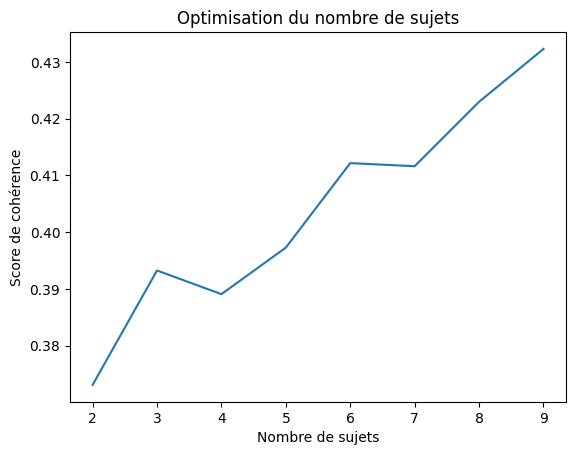

Nombre optimal de sujets : 9
Topic 0: 0.009*"dog" + 0.008*"head" + 0.006*"bug" + 0.006*"other" + 0.006*"chase" + 0.006*"cat" + 0.006*"car" + 0.005*"escape" + 0.005*"house" + 0.005*"shoot"
Topic 1: 0.017*"house" + 0.013*"school" + 0.010*"room" + 0.009*"night" + 0.008*"girl" + 0.008*"mother" + 0.008*"day" + 0.008*"home" + 0.007*"body" + 0.007*"friend"
Topic 2: 0.022*"father" + 0.018*"friend" + 0.017*"marry" + 0.016*"family" + 0.011*"girl" + 0.011*"brother" + 0.011*"day" + 0.010*"other" + 0.009*"mother" + 0.009*"money"
Topic 3: 0.020*"police" + 0.012*"murder" + 0.010*"shoot" + 0.009*"escape" + 0.008*"gang" + 0.008*"money" + 0.007*"arrest" + 0.007*"gun" + 0.006*"car" + 0.006*"steal"
Topic 4: 0.024*"ship" + 0.014*"island" + 0.013*"crew" + 0.010*"boat" + 0.009*"plane" + 0.009*"alien" + 0.007*"pilot" + 0.007*"fly" + 0.006*"sea" + 0.006*"return"
Topic 5: 0.016*"family" + 0.014*"child" + 0.013*"father" + 0.013*"son" + 0.011*"mother" + 0.011*"young" + 0.011*"wife" + 0.010*"daughter" + 0.009*"yea

In [34]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary


def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(
            corpus=corpus,
            num_topics=num_topics,
            id2word=dictionary,
            passes=10,
            workers=4,
            random_state=42,
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence='c_v'
        )
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

start = 2
limit = 10
step = 1 

model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary, corpus=corpus, texts=tokenized_documents, start=start, limit=limit, step=step
)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Nombre de sujets")
plt.ylabel("Score de cohérence")
plt.title("Optimisation du nombre de sujets")
plt.show()

best_num_topics = x[coherence_values.index(max(coherence_values))]
best_model = model_list[coherence_values.index(max(coherence_values))]

print(f"Nombre optimal de sujets : {best_num_topics}")

for idx, topic in best_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

travailler sur un compromis coherence/generalisation ==> oui ok increase # topics ==> increase coherence mais ca decrease la generalisation/interpretabilités ==> elbow methode pour la ou le gain en coherence est réduit

In [35]:
## Of course coherence increases with the number of topics because they are more and more precises, however this highly decreases the interpretability of our analysis. Therefore we choose 4 topics as a compromise between the coherence and the interpetrability of our system.
lda_4 = LdaMulticore(
    corpus=corpus,
    num_topics=6,
    id2word=dictionary,
    passes=10,
    workers=4,
    random_state=42,
    )
coherencemodel = CoherenceModel(
model=lda_4, texts=tokenized_documents, dictionary=dictionary, coherence='c_v'
)
print("For 4 topics, we have a coherence of {}".format(coherencemodel.get_coherence()))
for idx, topic in lda_4.print_topics(-1):
    print(f"Topic {idx}: {topic}")

For 4 topics, we have a coherence of 0.41358816946549765
Topic 0: 0.006*"head" + 0.006*"escape" + 0.006*"attack" + 0.006*"other" + 0.006*"dog" + 0.005*"house" + 0.005*"return" + 0.004*"body" + 0.004*"attempt" + 0.004*"chase"
Topic 1: 0.009*"house" + 0.008*"night" + 0.007*"room" + 0.007*"day" + 0.007*"home" + 0.006*"school" + 0.006*"time" + 0.006*"woman" + 0.006*"next" + 0.006*"mother"
Topic 2: 0.016*"friend" + 0.011*"father" + 0.009*"day" + 0.009*"other" + 0.008*"money" + 0.008*"marry" + 0.008*"family" + 0.008*"girl" + 0.008*"time" + 0.007*"home"
Topic 3: 0.018*"police" + 0.011*"murder" + 0.009*"shoot" + 0.008*"escape" + 0.007*"gang" + 0.007*"car" + 0.006*"money" + 0.006*"gun" + 0.006*"arrest" + 0.005*"steal"
Topic 4: 0.008*"ship" + 0.007*"attack" + 0.006*"soldier" + 0.006*"order" + 0.006*"force" + 0.006*"other" + 0.006*"escape" + 0.005*"return" + 0.005*"battle" + 0.005*"war"
Topic 5: 0.014*"family" + 0.013*"father" + 0.011*"son" + 0.010*"child" + 0.010*"mother" + 0.009*"young" + 0.009

In [29]:
# Vectorization for LDA
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(documents)

# LDA
lda = LatentDirichletAllocation(n_components=6,random_state=42) # random seed for reproducibility
lda.fit(doc_term_matrix)
doc_topic_dist = lda.transform(doc_term_matrix)

In [30]:
top_themes_per_document = []
for i, doc in enumerate(doc_topic_dist):
    top_indices = doc.argsort()[-3:][::-1] # Indices of the top 3 values in the array doc, sorted in descending order. 
    top_proportions = doc[top_indices]

    top_themes_per_document.append({
        "Wikipedia movie ID": ids[i],
        "Theme 1": top_indices[0],
        "Prop Theme 1": top_proportions[0],
        "Theme 2": top_indices[1],
        "Prop Theme 2": top_proportions[1],
        "Theme 3": top_indices[2],
        "Prop Theme 3": top_proportions[2]
    })

df_top_themes = pd.DataFrame(top_themes_per_document)


df_date_clean['Wikipedia movie ID'] = df_date_clean['Wikipedia movie ID'].astype(str)
df_top_themes['Wikipedia movie ID'] = df_top_themes['Wikipedia movie ID'].astype(str)
merged_df = pd.merge(df_date_clean, df_top_themes, on='Wikipedia movie ID', how='inner')
merged_df.head()

NameError: name 'df_date_clean' is not defined

In [ ]:
top_terms = []
terms = vectorizer.get_feature_names_out()
for index, topic in enumerate(lda.components_):
    top_terms.append([terms[i] for i in topic.argsort()[-10:]])

max_prop_movies = merged_df.loc[merged_df.groupby('Theme 1')['Prop Theme 1'].idxmax()]
max_prop_movies.head()


for index, row in max_prop_movies.iterrows():
    theme_id = row['Theme 1']
    print(f"Topic {theme_id} with top terms: {top_terms[theme_id]}")
    print(f"Top film for Topic {theme_id}: ID = {row['Wikipedia movie ID']}, Title = {row['Movie name']}\n")

In [ ]:
focus_countries = ['United States of America', 'India', 'United Kingdom', 'Japan', 'Argentina', 'Iran']

num_columns = 2
num_rows = 3
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 15))
fig.suptitle('Standardized Distribution of Movie Themes Across Countries')
axes = axes.flatten()

for idx, country in enumerate(focus_countries):
    # Filter movies by country
    movies = merged_df[merged_df['Movie country'] == country]
    
    # Count the main themes (Thème 1) and standardize the counts
    theme_counts = movies['Theme 1'].value_counts()
    theme_counts_stand = theme_counts / theme_counts.sum()
    
    # Plot as a bar chart
    axes[idx].bar(theme_counts_stand.index, theme_counts_stand.values,color=color_dict[country])
    axes[idx].set_title(f"{country}")
    axes[idx].set_xlabel("Main theme")
    axes[idx].set_ylabel("Standardized Distribution")
    axes[idx].set_xticks(theme_counts_stand.index)  # Ensure theme indices show up correctly on x-axis
    axes[idx].set_xticklabels(theme_counts_stand.index)

for ax in axes:
    ax.set_ylim(0, 0.7)

plt.tight_layout()
plt.show()